## 7.7 Tugas Image Filtering

**1. Low Pass Filter** 

In [7]:
# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 299.5, 201.5, -0.5)

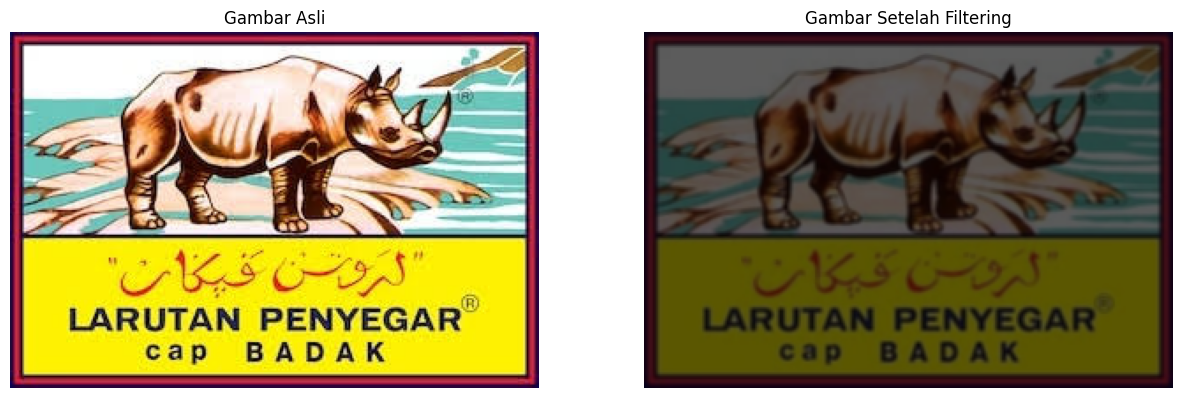

In [8]:

img = cv2.imread('images/badak.jpg')            # Load image dari local drive menggunakan OpenCV
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # Mengubah format citra dari BGR (default OpenCV) ke RGB
kernel = np.ones((3, 3), np.float32) / 25       # Membuat filter: matriks berukuran 5 x 5 dengan nilai setiap elemen adalah 1/25
badak_filter = cv2.filter2D(img, -1, kernel)    # Melakukan filtering pada citra menggunakan filter kernel

fig, axes = plt.subplots(1, 2, figsize=(15, 15))    # Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
ax = axes.ravel()

# Menampilkan citra original dan citra hasil averaging
ax[0].imshow(img)
ax[0].set_title("Gambar Asli")
ax[1].imshow(badak_filter)
ax[1].set_title("Gambar Setelah Filtering")

# Menghilangkan sumbu x dan y pada kedua gambar
ax[0].axis('off')
ax[1].axis('off')

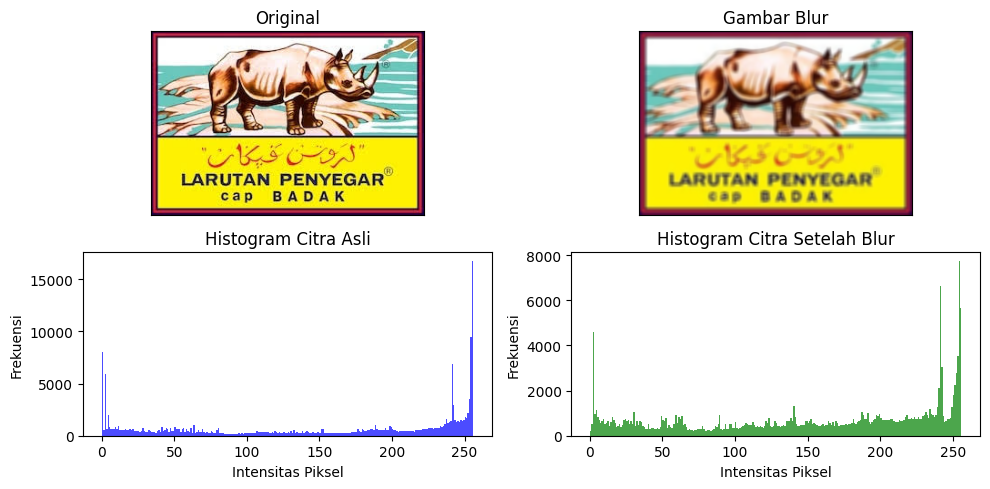

In [9]:
badak_blur = cv2.blur(img, (5, 5))          # Melakukan proses blurring pada citra 'img' menggunakan filter berukuran 5x5.

plt.rcParams["figure.figsize"] = (10, 5)    # Mengatur ukuran tampilan plot menjadi 10x5 inch.
plt.subplot(221)                            # Membuat subplot dengan 2 baris, 2 kolom, dan mengambil posisi pertama (1).
plt.imshow(img, cmap='gray')                # Menampilkan citra asli dengan menggunakan colormap 'gray'.
plt.title('Original')                       # Memberikan judul pada subplot.

# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])

plt.subplot(222)                            # Membuat subplot dengan 2 baris, 2 kolom, dan mengambil posisi kedua (2).
plt.imshow(badak_blur, cmap='gray')         # Menampilkan citra hasil blurring dengan menggunakan colormap 'gray'.
plt.title('Gambar Blur')                    # Memberikan judul pada subplot.

# Menghilangkan label sumbu x dan y.
plt.xticks([])
plt.yticks([])

plt.subplot(223)                            # Membuat subplot dengan 2 baris, 2 kolom, dan mengambil posisi ketiga (3).
plt.hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)   # Menampilkan histogram dari citra asli.
plt.title('Histogram Citra Asli')           # Memberikan judul pada subplot.

# Memberikan label sumbu x dan y.
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(224)                            # Membuat subplot dengan 2 baris, 2 kolom, dan mengambil posisi keempat (4).
plt.hist(badak_blur.ravel(), 256, [0, 256], color='green', alpha=0.7)   # Menampilkan histogram dari citra hasil blurring.
plt.title('Histogram Citra Setelah Blur')   # Memberikan judul pada subplot.

# Memberikan label sumbu x dan y.
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()          # Menyusun tata letak subplot secara otomatis.
plt.show()                  # Menampilkan plot.



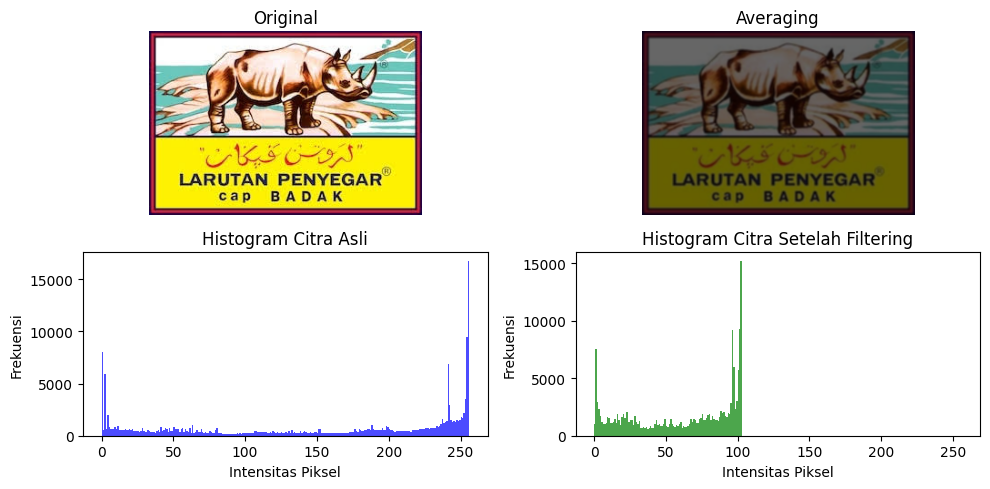

In [11]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
# Membuat kernel
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
# Membuat kernel dengan menggunakan np.matrix. Kernel ini berukuran 3x3 dan memiliki nilai tertentu yang digunakan untuk proses filtering.

badak_filter = cv2.filter2D(img, -1, kernel)        # Melakukan filtering

fig, axs = plt.subplots(2, 2, figsize=(10, 5))      # Membuat figure subplot

# Plot gambar asli
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

# Plot hasil filtering
axs[0, 1].imshow(badak_filter, cmap='gray')
axs[0, 1].set_title('Averaging')
axs[0, 1].axis('off')

# Plot histogram citra asli
axs[1, 0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axs[1, 0].set_title('Histogram Citra Asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Plot histogram citra setelah filtering
axs[1, 1].hist(badak_filter.ravel(), 256, [0, 256], color='green', alpha=0.7)
axs[1, 1].set_title('Histogram Citra Setelah Filtering')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Menyusun tata letak subplot secara otomatis agar lebih rapi.
plt.tight_layout()
plt.show()

**2. High Pass Filter** 

In [ ]:
# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'Histogram - Laplacian')

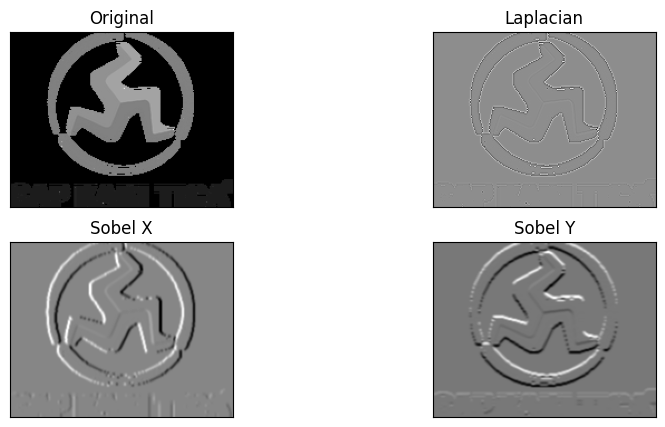

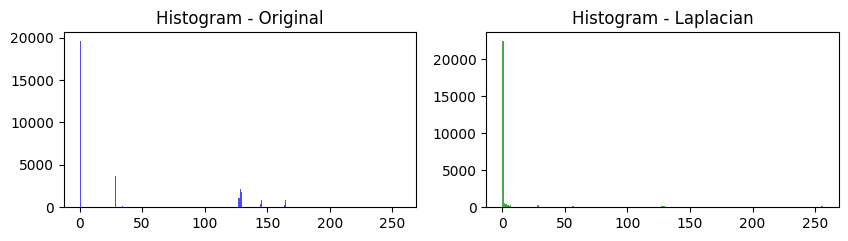

In [13]:
# Load image input
img = cv2.imread('images/capkakitiga.png', 0)

# Menerapkan algoritma high-pass filtering:
# Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (10, 5)

# Menampilkan hasil filter
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# Membuat histogram dalam satu plot
plt.figure()
plt.subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
plt.title('Histogram - Original')
plt.subplot(2, 2, 2)
plt.hist(laplacian.ravel(), 256, [0, 256], color='green', alpha=0.7)
plt.title('Histogram - Laplacian')



Text(0, 0.5, 'Frequency')

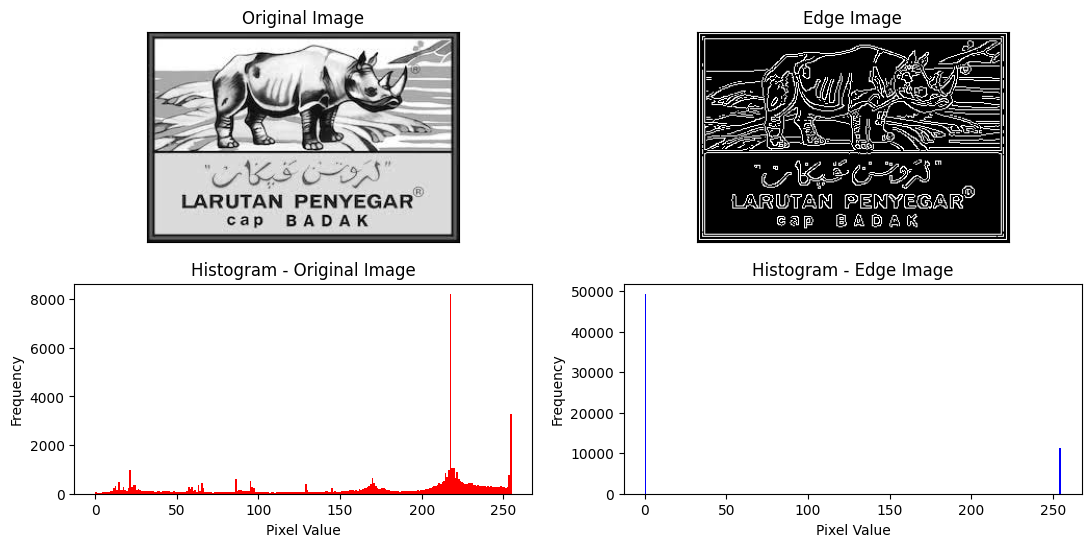

In [16]:
# Memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('images/badak.jpg', 0)

# Memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img, 100, 200)

# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (13, 6)

# Menampilkan citra asli dan citra tepi dalam satu plot
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Menampilkan histogram citra asli
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), bins=256, color='red')
plt.title('Histogram - Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Menampilkan histogram citra sesudah filtering
plt.subplot(2, 2, 4)
plt.hist(edges.ravel(), bins=256, color='blue')
plt.title('Histogram - Edge Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

**3. Image Thresholding**

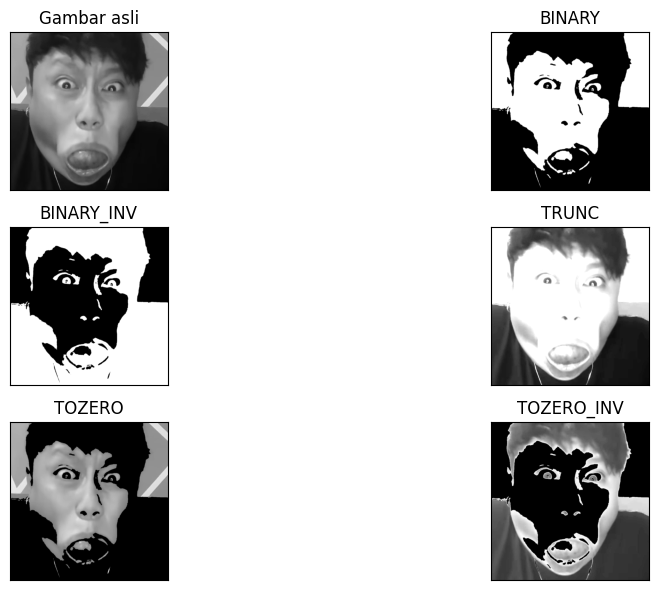

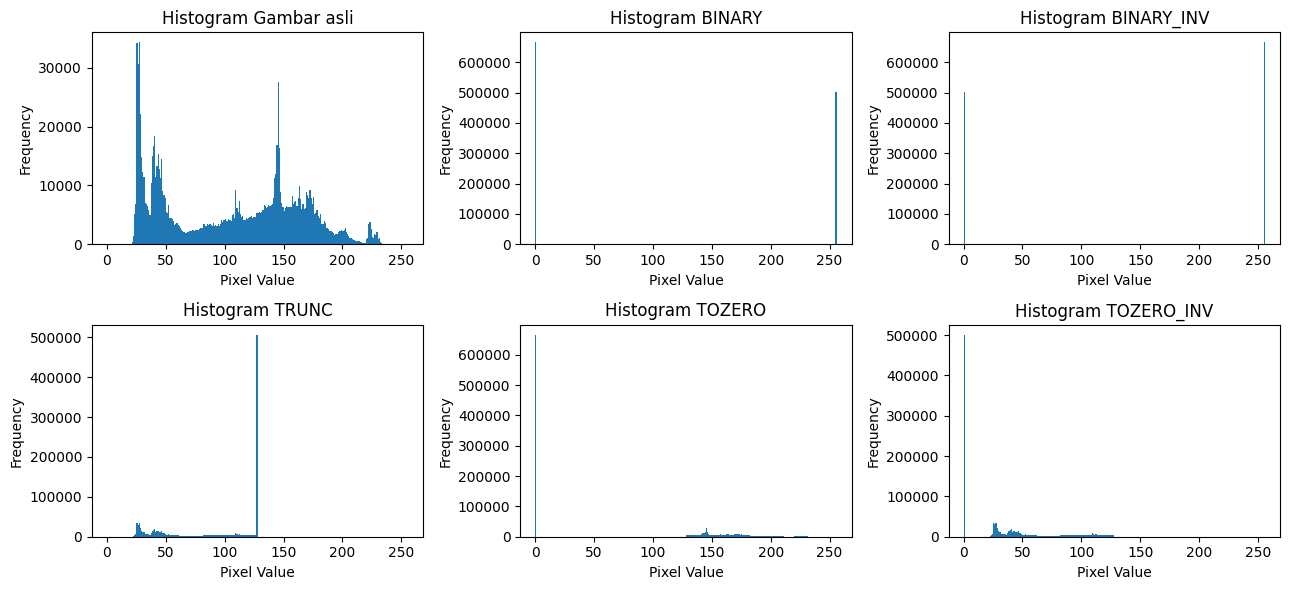

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load gambar input
img = cv2.imread('images/kedondong.jpg', 0)

# Hitungan threshold.
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi yang diberikan
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Mengatur tata letak subplot agar lebih rapi dan menampilkan plot.
plt.tight_layout()
plt.show()

# Membuat histogram dari gambar asli
plt.subplot(2, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Gambar asli')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Membuat histogram dari gambar setelah di filter
for i in range(1, 6):
    plt.subplot(2, 3, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram ' + titles[i])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



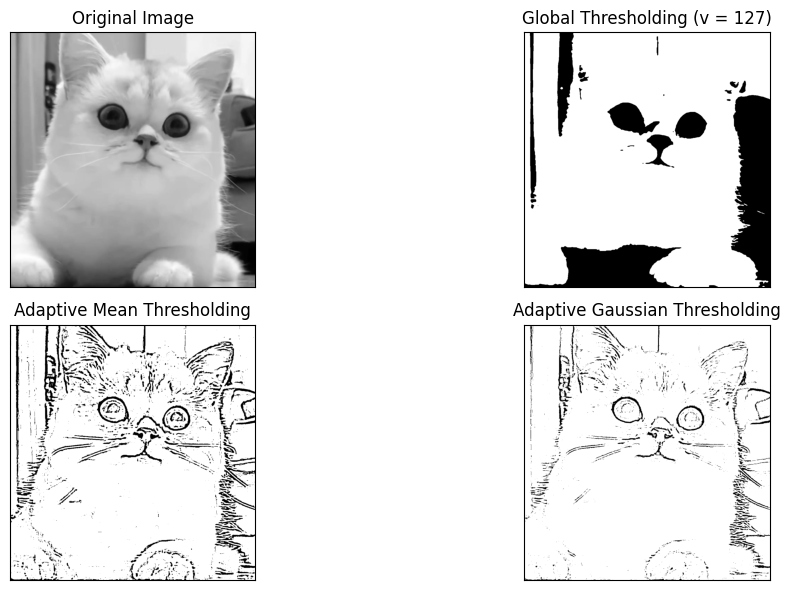

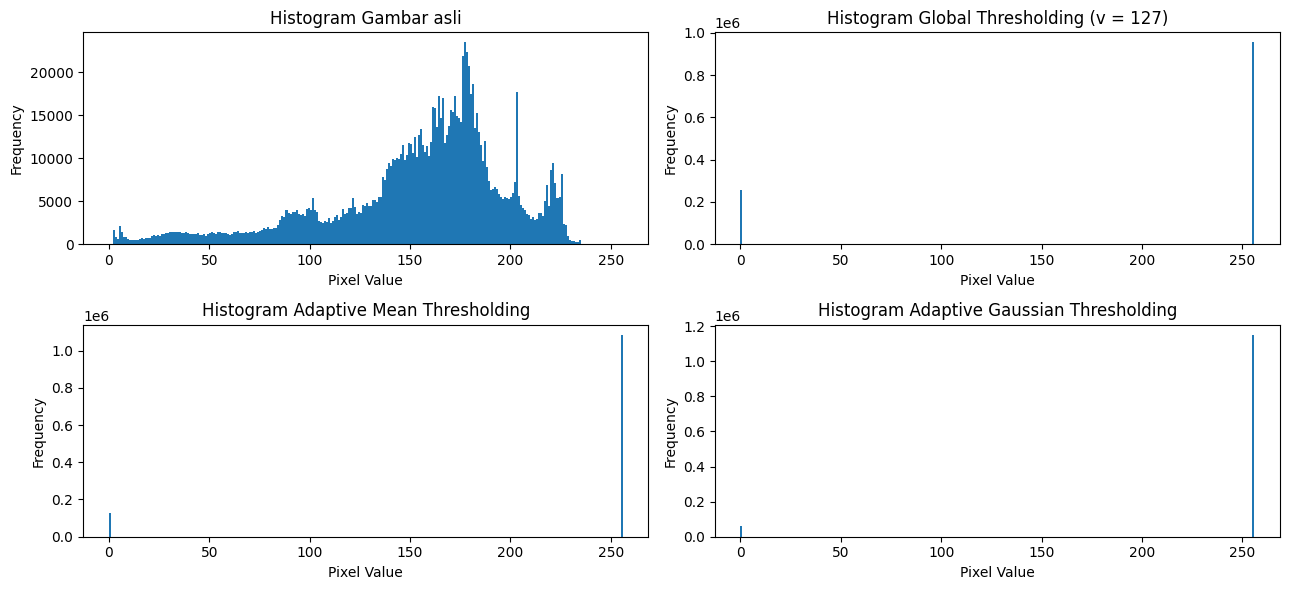

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# membaca gambar
img = cv2.imread('images/smile_cat.jpg', 0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img, 5)

# Lakukan Thresholding
# Binary Threshold
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

 #Melakukan iterasi untuk menampilkan gambar-gambar secara berurutan. Mengatur tata letak subplot dengan 2 baris dan 2 kolom. Menampilkan gambar pada subplot yang sesuai, memberikan judul menggunakan 'titles', dan menghilangkan label sumbu x dan y.
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
# Mengatur tata letak subplot agar lebih rapi dan menampilkan plot.
plt.tight_layout()
plt.show()

# Membuat histogram dari gambar asli
plt.subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Gambar asli')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Membuat histogram dari gambar setelah di filter
for i in range(1, 4):
    plt.subplot(2, 2, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram ' + titles[i])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
#
